In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('original/ArchiveII_with_motiv.csv')
df['fam'] = df['id'].str.split('_').str[0]
df['pseudo_probe'] = df['structure'].apply(
    lambda s: [1 if c in ['(', ')'] else 0 for c in s]
)
display(df.head())
df.to_csv('original/ArchiveII_with_prob_and_motiv.csv', index=False)

,id,sequence,structure,base_pairs,len,motivos,fam,pseudo_probe
0,5s_Acholeplasma-laidlawii-1,UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...,((((((((......((((((((....((((((.............)...,"[[1, 111], [2, 110], [3, 109], [4, 108], [5, 1...",112,SSSSSSSSMMMMMMSSSSSSSSIIIISSSSSSHHHHHHHHHHHHHS...,5s,"[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, ..."
1,5s_Acidovorax-temperans-1,UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...,.(((((((((.....((((((((.....((((((...............,"[[2, 115], [3, 114], [4, 113], [5, 112], [6, 1...",115,ESSSSSSSSSMMMMMSSSSSSSSIIIIISSSSSSHHHHHHHHHHHH...,5s,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, ..."
2,tmRNA_Stre.gord._TRW-29390_1-349,GGGGUCGUUACGGAUUCGACAGGCAUUAUGAGGCAUAUUUUGCGAC...,(((((((............((((((((....(((((((((..((((...,"[[1, 345], [2, 344], [3, 343], [4, 342], [5, 3...",349,SSSSSSSMMMMMMMMMMMMSSSSSSSSIIIISSSSSSSSSIISSSS...,tmRNA,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...,UCCGUUGUGGUCCAACGGCUAGGAUUCGUCGCUUUCACCGACGGGA...,(((((((..((((........))))((((((.......)))))).....,"[[1, 71], [2, 70], [3, 69], [4, 68], [5, 67], ...",75,SSSSSSSMMSSSSHHHHHHHHSSSSSSSSSSHHHHHHHSSSSSSMM...,tRNA,"[1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, ..."
4,srp_List.mono._U15684,UGGGUUGAUGAGCGUGAAGCCUUCGCUCGGUUGGAUUUUUCUUCAU...,.(.((((...(.(.((.(.((..(.....)..)).)...(...(.....,"[[2, 276], [4, 274], [5, 273], [6, 272], [7, 2...",279,ESISSSSIIISMSISSMSISSIISHHHHHSIISSISMMMSIIISHH...,srp,"[0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, ..."


In [7]:
print(df.head(3)[['id', 'sequence', 'structure']])

                                 id  \
0       5s_Acholeplasma-laidlawii-1   
1         5s_Acidovorax-temperans-1   
2  tmRNA_Stre.gord._TRW-29390_1-349   

                                            sequence  \
0  UCUGGUGACGAUAGGUAAGAUGGUUCACCUGUUCCCAUCCCGAACA...   
1  UGCCUGAUGACCAUAGCAAGUUGGUACCACUCCUUCCCAUCCCGAA...   
2  GGGGUCGUUACGGAUUCGACAGGCAUUAUGAGGCAUAUUUUGCGAC...   

                                           structure  
0  ((((((((......((((((((....((((((.............)...  
1  .(((((((((.....((((((((.....((((((...............  
2  (((((((............((((((((....(((((((((..((((...  


/tmp/ipykernel_1027720/549935258.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: (g['pseudo_probe'].apply(sum) / g['len']).mean())


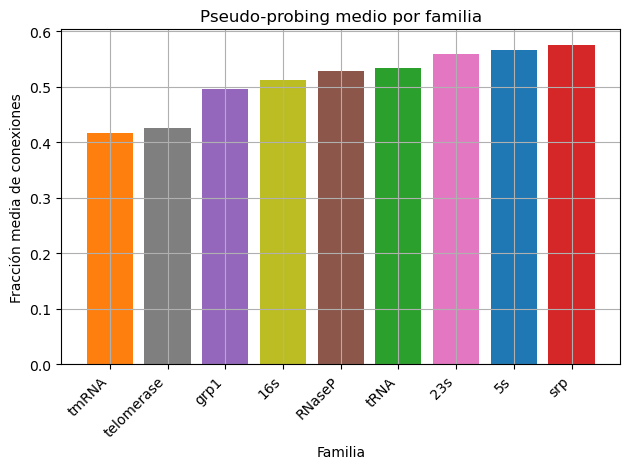

In [27]:
resultado = df.groupby('fam') \
    .apply(lambda g: (g['pseudo_probe'].apply(sum) / g['len']).mean())


# Lista de familias en el orden que quieres mostrar
families = ['5s', 'tmRNA', 'tRNA', 'srp', 'grp1', 'RNaseP', '23s', 'telomerase', '16s']

# Reindexamos por si alguna falta u sobra
resultado = resultado.reindex(families).sort_values()

# Usamos un colormap de matplotlib para extraer colores distintos
cmap = plt.get_cmap('tab10')
color_map = {fam: cmap(i) for i, fam in enumerate(families)}

# Dibujamos el gráfico de barras
fig, ax = plt.subplots()
ax.bar(
    resultado.index,
    resultado.values,
    color=[color_map[f] for f in resultado.index]
)

# Ajustes de etiquetas
ax.set_xlabel('Familia')
ax.set_ylabel('Fracción media de conexiones')
ax.set_title('Pseudo-probing medio por familia')
ax.grid()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
